In [1]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at /media/me/DATA/Dropbox/31_Projekte/01_Python/libs
Start Time: 16:52:11


time: 432 ms (started: 2022-10-31 16:52:11 +01:00)


# Review and visualize
Review and visualize data that meets your criteria. <br>
This notebook raises errors for demonstration purpose.
* `plot`: Plot with seaborn without configuration
* `check_mask`: Count rows filtered by a binary mask. Raises an error, if the number is unexpected.
* `sample`: Returns some sample rows: beginning + end + random rows in the middle, prefering rows without NaNs
* `search_str`: Searches all str columns of a dataframe. Useful for development and debugging.
* `grid`: Visualize with dtale

In [2]:
import numpy      as np
import pandas     as pd 
#import bpyth      as bpy
import pandasklar as pak 

grid = pak.grid

time: 1.34 s (started: 2022-10-31 16:52:12 +01:00)


## plot(): Plot with seaborn without configuration

In [3]:
?pak.plot

time: 71.7 ms (started: 2022-10-31 16:52:13 +01:00)


Signature:
pak.plot(
    df1,
    df2=None,
    x='--',
    size=(16, 4),
    palette=('rainbow', 'tab10'),
    line=(1, 1),
)
Docstring:
Plots DataFrames or Series.
* df1, df2: The first two parameters are DataFrames or Series. 
            If there are two, they get separate y-axes.
* x:        Which column contains the x-axis? 
            x=='index' -> The index is used as x.    
            If no x is given, x is tried to be guessed. 
            If no suitable column is found, the index is used as x.
            A column is considered suitable if it is called 'x', 'X' or 'index'.
size:       Width and height of the plot as tuples
palette:    The two palettes as tuple or sting
line:       The line thickness as tuple or number    
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/plot.py
Type:      function


In [4]:
# Several types of random numbers, with parameters
size = 100
a = pak.random_series( size, 'ascending'                    )
b = pak.random_series( size, 'ascending'                    )
c = pak.random_series( size, 'descending'                   )
d = pak.random_series( size, 'descending'                   )
e = pak.random_series( size, 'perlin',     freq=2           )
f = pak.random_series( size, 'perlin',     freq=[16,1,8,1]  )
g = pak.random_series( size, 'perlin',     freq=[4,1,8,128] )

df = pak.dataframe( (a,b,c,d,e,f,g) )
pak.sample(df)

,A,B,C,D,E,F,G
0,0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1,0,0.002598,0.998079,0.996711,-0.037540,-0.264866,0.045434
9,0,0.071590,0.905901,0.848071,-0.386442,-0.514265,0.511631
27,0,0.184817,0.426762,0.621079,-1.000000,0.508804,-0.278248
46,0,0.247130,0.124748,0.598096,-0.414985,0.613341,-0.512688
98,0,0.999392,0.000403,0.005080,0.078704,-0.251240,-0.042171
99,0,1.000000,0.000000,0.000000,0.039039,-0.215166,-0.026560


time: 140 ms (started: 2022-10-31 16:52:13 +01:00)


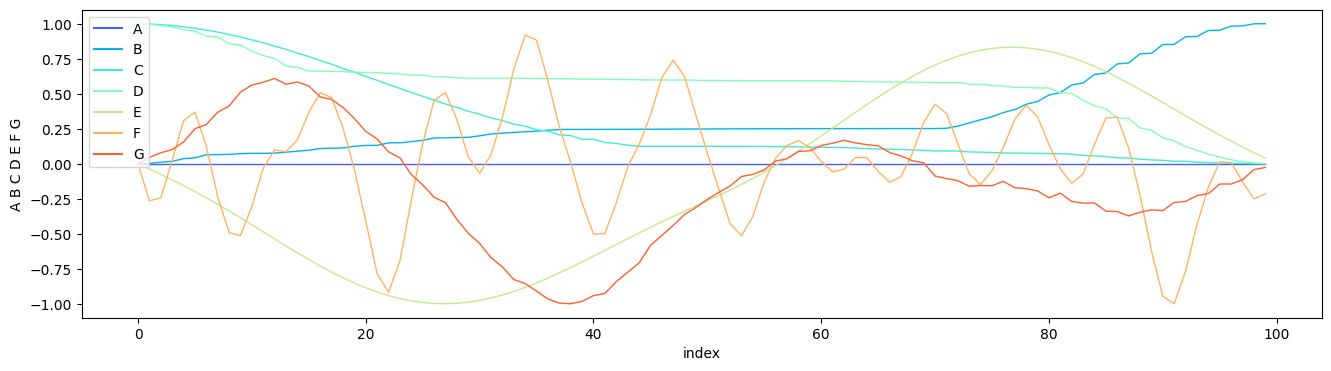

time: 4.7 s (started: 2022-10-31 16:52:13 +01:00)


In [5]:
# just plot all together
%matplotlib inline
pak.plot(df)

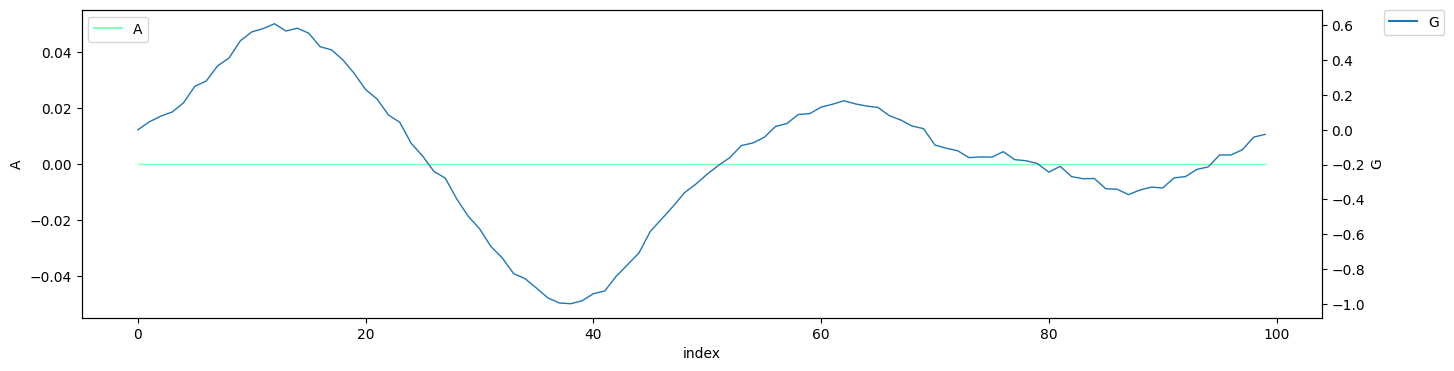

time: 3.27 s (started: 2022-10-31 16:52:18 +01:00)


In [6]:
# plot 2 Series, use different y-axis
%matplotlib inline
pak.plot(df.A, df.G)

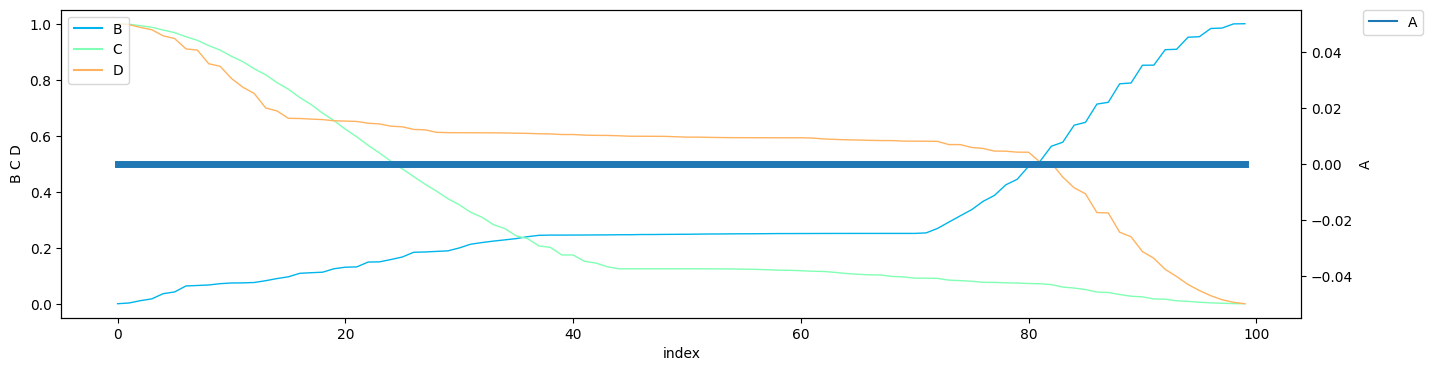

time: 3.97 s (started: 2022-10-31 16:52:21 +01:00)


In [7]:
# plot DataFrame + Series, use different line thickness
%matplotlib inline 
pak.plot(df[list('BCD')], df.A, line=(1,5))

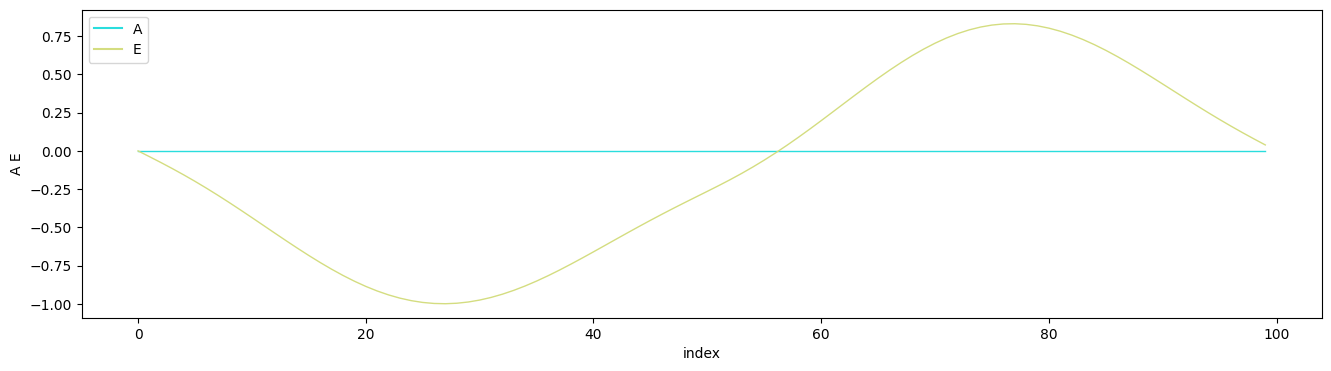

time: 2.46 s (started: 2022-10-31 16:52:25 +01:00)


In [8]:
# plot E (Perlin) and A (ascending)
%matplotlib inline 
pak.plot(df[list('AE')])

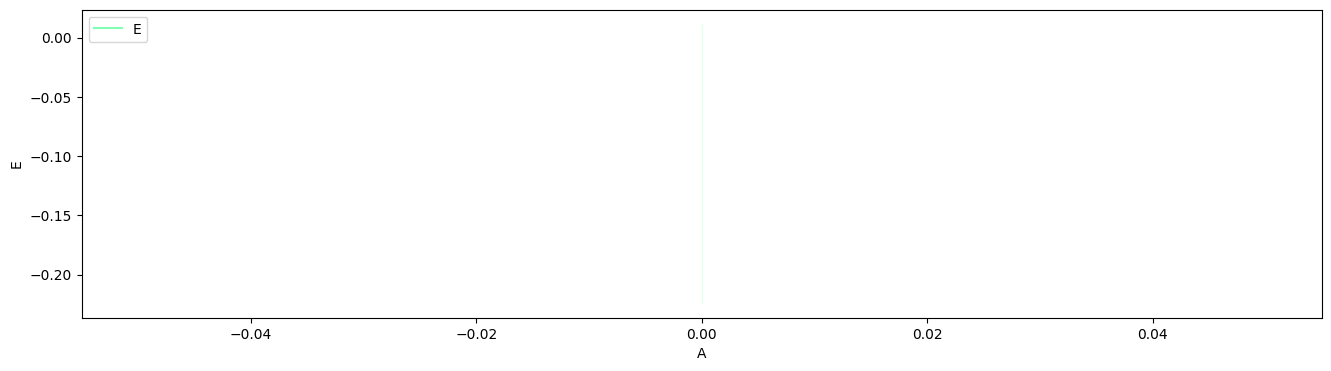

time: 1.69 s (started: 2022-10-31 16:52:28 +01:00)


In [9]:
# plot E using A as x-Axis
%matplotlib inline 
pak.plot(df[list('AE')], x='A')

## sample(): Returns some sample rows

In [10]:
?pak.sample

time: 42.6 ms (started: 2022-10-31 16:52:30 +01:00)


Signature: pak.sample(df, size=7)
Docstring:
Returns some sample rows.
Always the beginning and the end, 
plus some random rows in the middle, prefering rows without NaNs.
* size: Number of rows returned
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/analyse.py
Type:      function


In [11]:
# create test data
df = pak.people()
df['birthplace'] = df.birthplace.fillna('Hamburg')
df

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Leah,37,30,98886,Berlin,3q0jäFY,"{q, F, J, R}","[A, C, C, B]"
1,Adolf,25,20,<NA>,Bremen,p5RjMJaT3,"{B, l, v, I, b}","[c, b, a]"
2,Astrid,26,20,37296,Berlin,pqKFaX,"{z, Z}","[A, B, C]"
3,Ute,24,20,77027,Hamburg,t9uHpCQjXy,"{x, P, l}","[b, b, a, b]"
4,Matthias,33,30,10434,Hamburg,bEÄFsöva2t,"{E, A}","[a, b, c]"
...,...,...,...,...,...,...,...,...
95,Lea,29,20,46682,Hamburg,s4vMfÜx,"{x, 2, g, c, S}","[A, x]"
96,Denis,37,30,<NA>,Hamburg,PTÖÜdGUe,"{i, x, 0}","[A, B, C, C]"
97,Jakob,35,30,60035,Bremen,uWXS56iO,"{E, A}","[a, b, c]"
98,Kirsten,30,30,32814,Bremen,bqhÄGKäOQY,"{4, l, b}","[c, b, a]"


time: 142 ms (started: 2022-10-31 16:52:30 +01:00)


In [12]:
pak.sample(df)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Leah,37,30,98886,Berlin,3q0jäFY,"{q, F, J, R}","[A, C, C, B]"
1,Adolf,25,20,<NA>,Bremen,p5RjMJaT3,"{B, l, v, I, b}","[c, b, a]"
4,Matthias,33,30,10434,Hamburg,bEÄFsöva2t,"{E, A}","[a, b, c]"
34,Tanja,34,30,43277,Bremen,8Oi2A,"{O, 1, l, i}",[]
35,Sophia,27,20,73302,Hamburg,pPÖäSBQr6X,"{h, 0}","[A, B, C, C]"
98,Kirsten,30,30,32814,Bremen,bqhÄGKäOQY,"{4, l, b}","[c, b, a]"
99,Gerhard,30,30,34307,Berlin,B4OW9V,"{2, i}","[c, b, a]"


time: 60.8 ms (started: 2022-10-31 16:52:30 +01:00)


## search_str(): Searches all str columns of a dataframe

In [13]:
?pak.search_str

time: 35.5 ms (started: 2022-10-31 16:52:30 +01:00)


Signature: pak.search_str(df, find, without=[])
Docstring:
Searches all str columns of a dataframe.
Useful for development and debugging.
* find:    What is to be found?                  String or list of strings.
* without: Which columns should not be searched? String or list of strings.    
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [14]:
# create mask: most frequent first_name
find = ['Hamburg', pak.most_freq_elt(df.first_name)]
print('search for',find)

search for ['Hamburg', 'Lea']
time: 32 ms (started: 2022-10-31 16:52:30 +01:00)


In [15]:
pak.search_str(df, find)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
3,Ute,24,20,77027,Hamburg,t9uHpCQjXy,"{x, P, l}","[b, b, a, b]"
4,Matthias,33,30,10434,Hamburg,bEÄFsöva2t,"{E, A}","[a, b, c]"
5,Mara,36,30,58479,Hamburg,ÜoyXxfLM,"{N, y, e}","[A, B, C, C]"
6,Martina,31,30,31744,Hamburg,NCoRl,"{4, C, T, H}","[A, A, A]"
7,Marius,31,30,50146,Hamburg,p9YzZiüv5N,"{F, E, Y, J, b}",[]
9,Dagmar,23,20,22392,Hamburg,0OMXpDl,"{B, c, F}","[a, b, c]"
11,Jonathan,24,20,26080,Hamburg,dQGolc,"{s, J, j}","[A, B, C, C]"
15,Stella,33,30,71851,Hamburg,CÖeWxLötv,"{g, H}","[A, A, A]"
16,Maike,34,30,87132,Hamburg,eCuyaac,"{4, Q, I, w}","[A, A, A]"
17,Luka,36,30,58760,Hamburg,iÖüGR8YoLs,"{s, W, 0}","[c, b, a]"


time: 71.7 ms (started: 2022-10-31 16:52:30 +01:00)


## check_mask(): Count rows filtered by a binary mask

In [16]:
?pak.check_mask

time: 47.2 ms (started: 2022-10-31 16:52:30 +01:00)


Signature:
pak.check_mask(
    df,
    mask,
    expectation_min=None,
    expectation_max=None,
    msg='',
    stop=True,
    verbose=None,
)
Docstring:
Count rows filtered by a binary mask.
Raises an error, if the number is unexpected.

Examples:
check_mask( df, mask )         # just show the number of rows   
check_mask( df, mask, 2000 )   # checks for about 2000 rows (if not 0: not more than double, not less than half)
check_mask( df, mask, 0 )      # checks for exactly 0 rows    
check_mask( df, mask, 10, 50)  # checks for 10..50 rows

Example with later raise:
error = check_mask(df, mask, 214, stop=False)        
grid(df, mask, error)        
bpy.raise_if(error)
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [17]:
# define mask
mask = (df.age >= 30)  &  (df.age < 40) 
#df[mask]

time: 41.1 ms (started: 2022-10-31 16:52:30 +01:00)


In [18]:
# just show the number of rows
pak.check_mask(df, mask)

 64 rows
time: 43.4 ms (started: 2022-10-31 16:52:30 +01:00)


In [19]:
# checks for about 50 rows
pak.check_mask(df, mask, 50)

time: 36.2 ms (started: 2022-10-31 16:52:30 +01:00)


In [20]:
# checks for about 50 rows
pak.check_mask(df, mask, 50, verbose=True)

 64 rows
time: 41.5 ms (started: 2022-10-31 16:52:30 +01:00)


In [21]:
# checks for 0..100 rows
pak.check_mask(df, mask, 0, 100)

time: 40.9 ms (started: 2022-10-31 16:52:30 +01:00)


## grid(): Visualize with dtale

In [22]:
?grid

time: 32.3 ms (started: 2022-10-31 16:52:30 +01:00)


Signature: grid(df, mask=None, error='€€€', color='blue', **kwargs)
Docstring:
Visualization of a DataFrame using dtale.
* df:     DataFrame to show
* mask:   Binary mask of function to reduce the number of rows
* error:  Error message
* color:  Color of the error message.
* kwargs: Options for dtale. See https://github.com/man-group/dtale#instance-settings
          Caution: This will affect all grids in this notebook...
dtale may not work in a multiscreen setting on windows.

=== Examples ===
grid(df)                        # show all rows
grid(df,mask)                   # show with binary mask    
grid(df,sample)                 # show with functionally mask

=== For error indication after check_mask ===
error = check_mask(df, mask, 900, stop=False)
grid(df, mask, error) 
and later: raise_if(error)
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [23]:
# show
grid(df)

100 rows


time: 295 ms (started: 2022-10-31 16:52:30 +01:00)


### grid(): Use mask

In [24]:
# Function as mask
grid(df, pak.sample)

7 rows out of 100


time: 234 ms (started: 2022-10-31 16:52:31 +01:00)


In [25]:
# Binary mask
mask = df.age > 25
grid(df, mask)

88 rows out of 100


time: 110 ms (started: 2022-10-31 16:52:31 +01:00)


### grid() options
Some grid options are global, e.g. max_column_width. If you set this option to a value later in your notebook, all grids in the notebook are rendered with this column_width. If you find a way to change this, send me a message.

In [26]:
# global Settings
pak.set_grid(max_column_width=200)

time: 34.9 ms (started: 2022-10-31 16:52:31 +01:00)


In [27]:
# show 
grid(df)

100 rows


time: 126 ms (started: 2022-10-31 16:52:31 +01:00)


### grid(): Advanced Formating
See options on https://github.com/man-group/dtale#instance-settings

In [28]:
mask = df.age > 25
grid(df, mask, sort=[('first_name','ASC')], background_mode='heatmap-col-age')
#grid(df, mask, drop_index=True,)

88 rows out of 100


time: 144 ms (started: 2022-10-31 16:52:31 +01:00)


### grid(): Special cases

In [29]:
# No DataFrame
grid(None)

Nothing to show
time: 42.7 ms (started: 2022-10-31 16:52:31 +01:00)


In [30]:
# Empty DataFrame
d = pd.DataFrame()
grid(d)

No rows
time: 33.2 ms (started: 2022-10-31 16:52:31 +01:00)


In [31]:
# 100% filtered 
mask = df.age > 1000
grid(df,mask)

No rows, mask filters them all away
time: 65.6 ms (started: 2022-10-31 16:52:32 +01:00)


In [32]:
# 100% filtered, and this is good
mask = df.age > 1000
grid(df,mask, color='green')

No rows, mask filters them all away
time: 58.8 ms (started: 2022-10-31 16:52:32 +01:00)


In [33]:
# 100% filtered, and this is bad
mask = df.age > 1000
grid(df,mask, color='red')

No rows, mask filters them all away
time: 83.2 ms (started: 2022-10-31 16:52:32 +01:00)


### grid() & check_mask(): Show error rows and raise later

In [34]:
# define a mask that contains errors
# say our error is df.birthplace == 'Hamburg',
# we don't want that to happen,
# but if it happens we would like to see the rows
mask = df.birthplace == 'Hamburg'
pak.check_mask(df,mask)

 37 rows
time: 50.1 ms (started: 2022-10-31 16:52:32 +01:00)


In [35]:
# checking for 0 raises an error, as we want.
# But we don't see the rows affected
pak.check_mask(df,mask, 0)

Exception: ERROR: 37 rows, but it should be a maximum of 0

time: 730 ms (started: 2022-10-31 16:52:32 +01:00)


In [36]:
# so we use this to show the error rows first
error = pak.check_mask(df,mask, 0, stop=False)
grid(df, mask, error) 

ERROR: 37 rows, but it should be a maximum of 0
37 rows out of 100


time: 94.8 ms (started: 2022-10-31 16:53:23 +01:00)


In [37]:
# and raise later
bpy.raise_if(error)

Exception: ERROR: 37 rows, but it should be a maximum of 0

time: 102 ms (started: 2022-10-31 16:53:27 +01:00)
Executing shutdown due to inactivity...


2022-10-31 17:53:24,356 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-10-31 17:53:24,368 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_server()
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/dtale/app.py", line 421, in shutdown_server
    raise RuntimeError("Not runnin

2022-10-31 17:53:24,372 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_server()
  File "/home/me/mambaforge/envs/plain_01/lib/python3.9/site-packages/dtale/app.py", line 421, in shutdown_serv